In [24]:
# --- FASE 1: EXTRACCI√ìN DE DATOS DESDE LA API ---

# 1. Importaci√≥n de Librer√≠as
# Importamos Pandas, la librer√≠a esencial para todo el manejo de datos en Python.
import pandas as pd

# 2. Definici√≥n de la Fuente de Datos
# La informaci√≥n de nuestros clientes se encuentra en un archivo JSON alojado en GitHub.
# Esta URL apunta directamente al contenido crudo del archivo.
url_datos_clientes = "https://github.com/ingridcristh/challenge2-data-science-LATAM/raw/refs/heads/main/TelecomX_Data.json"

# 3. Carga de Datos
# Usamos la funci√≥n pd.read_json() para leer los datos desde la URL y cargarlos en un DataFrame.
datos_originales = pd.read_json(url_datos_clientes)

# 4. Verificaci√≥n Inicial
# Es una buena pr√°ctica visualizar las primeras filas para confirmar que la carga fue exitosa
# y para tener una primera idea de la estructura de los datos.
print("--- Datos crudos cargados exitosamente. Vista previa: ---")
display(datos_originales.head())

--- Datos crudos cargados exitosamente. Vista previa: ---


customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

# FASE 2: Transformaci√≥n y Limpieza de Datos

In [25]:
# --- Paso 2.1: Normalizaci√≥n de Datos Anidados ---

# Los datos en las columnas 'customer', 'phone', etc., son diccionarios.
# Usaremos la potente funci√≥n pd.json_normalize() para expandir estos diccionarios en sus propias columnas.

# Convertimos el DataFrame a una lista de diccionarios, que es el formato que la funci√≥n necesita.
registros_json = datos_originales.to_dict('records')

# Aplicamos la normalizaci√≥n. Pandas se encargar√° de aplanar todas las columnas anidadas.
datos_aplanados = pd.json_normalize(registros_json)

# Verificamos el resultado. La tabla ahora ser√° mucho m√°s ancha y todas las columnas estar√°n a la vista.
print("--- Datos aplanados y normalizados con √©xito. Vista previa: ---")
display(datos_aplanados.head())

--- Datos aplanados y normalizados con √©xito. Vista previa: ---


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [26]:
# --- Paso 2.2: Diagn√≥stico Inicial de los Datos ---

# 1. Informaci√≥n General: Verificamos los tipos de datos (Dtype) y el conteo de valores no nulos.
print("--- 1. Informaci√≥n General del DataFrame Aplanado ---")
datos_aplanados.info()

print("\n" + "="*60 + "\n") # Separador para mayor claridad

# 2. Conteo de Valores Nulos: Hacemos un conteo expl√≠cito de datos faltantes por columna.
print("--- 2. Conteo de Valores Nulos (Datos Faltantes) por Columna ---")
print(datos_aplanados.isnull().sum())

--- 1. Informaci√≥n General del DataFrame Aplanado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object

In [27]:
# --- Paso 2.3: Correcci√≥n de Tipos de Datos ---

# 1. Convertir la columna 'account.Charges.Total' a un formato num√©rico.
# Usamos 'errors=coerce' para que cualquier valor que no se pueda convertir (como un espacio en blanco)
# se transforme autom√°ticamente en un valor Nulo (NaN).
datos_aplanados['account.Charges.Total'] = pd.to_numeric(datos_aplanados['account.Charges.Total'], errors='coerce')

# 2. Verificar si la conversi√≥n cre√≥ nuevos valores nulos.
# Esto nos dir√° cu√°ntas filas ten√≠an datos no num√©ricos.
print("--- Conteo de Nulos DESPU√âS de la conversi√≥n ---")
print(datos_aplanados.isnull().sum())

# 3. Eliminar las filas con valores nulos en 'account.Charges.Total'.
# Como el cargo total es vital para el an√°lisis, las filas sin este dato no son √∫tiles.
# 'inplace=True' aplica el cambio directamente sobre nuestro DataFrame.
datos_aplanados.dropna(subset=['account.Charges.Total'], inplace=True)

# 4. Verificaci√≥n Final
# Usamos .info() de nuevo para confirmar que la columna ahora es de tipo float64
# y que ya no hay valores nulos en ninguna parte.
print("\n--- Verificaci√≥n Final del DataFrame ---")
datos_aplanados.info()

--- Conteo de Nulos DESPU√âS de la conversi√≥n ---
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64

--- Verificaci√≥n Final del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cu

In [28]:
# --- Paso 2.4: Verificaci√≥n de Consistencia en Datos Categ√≥ricos ---

# Seleccionamos todas las columnas de tipo 'object' (texto)
columnas_de_texto = datos_aplanados.select_dtypes(include=['object']).columns

# Usamos un bucle para revisar cada columna y mostrar sus valores √∫nicos.
for columna in columnas_de_texto:
  print(f"--- Valores √önicos en la Columna: {columna} ---")
  print(datos_aplanados[columna].unique())
  print("\n" + "="*50 + "\n")

--- Valores √önicos en la Columna: customerID ---
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']


--- Valores √önicos en la Columna: Churn ---
['No' 'Yes' '']


--- Valores √önicos en la Columna: customer.gender ---
['Female' 'Male']


--- Valores √önicos en la Columna: customer.Partner ---
['Yes' 'No']


--- Valores √önicos en la Columna: customer.Dependents ---
['Yes' 'No']


--- Valores √önicos en la Columna: phone.PhoneService ---
['Yes' 'No']


--- Valores √önicos en la Columna: phone.MultipleLines ---
['No' 'Yes' 'No phone service']


--- Valores √önicos en la Columna: internet.InternetService ---
['DSL' 'Fiber optic' 'No']


--- Valores √önicos en la Columna: internet.OnlineSecurity ---
['No' 'Yes' 'No internet service']


--- Valores √önicos en la Columna: internet.OnlineBackup ---
['Yes' 'No' 'No internet service']


--- Valores √önicos en la Columna: internet.DeviceProtection ---
['No' 'Yes' 'No internet service']


--- Valores √önicos e

In [29]:
# --- Paso 2.5: Limpieza Final y Estandarizaci√≥n de Texto ---

# 1. Aplicamos .str.strip() para eliminar cualquier espacio en blanco al inicio o final
# de los strings en todas las columnas de texto. Es una pr√°ctica de limpieza profesional.
for columna in datos_aplanados.select_dtypes(include=['object']).columns:
  datos_aplanados[columna] = datos_aplanados[columna].str.strip()

# 2. Ahora que los espacios en blanco se han convertido en strings vac√≠os (''),
# filtramos el DataFrame para mantener solo las filas donde 'Churn' no es un string vac√≠o.
datos_limpios = datos_aplanados[datos_aplanados['Churn'] != ''].copy()

# 3. Verificaci√≥n Final: Comprobamos los valores √∫nicos de 'Churn' y las dimensiones finales.
print("--- Verificaci√≥n de la columna 'Churn' despu√©s de la limpieza ---")
print(datos_limpios['Churn'].unique())

print(f"\nDimensiones finales del DataFrame limpio: {datos_limpios.shape}")

--- Verificaci√≥n de la columna 'Churn' despu√©s de la limpieza ---
['No' 'Yes']

Dimensiones finales del DataFrame limpio: (7032, 21)


In [30]:
# --- Paso 2.6: Enriquecimiento de Datos (Feature Engineering) ---

# 1. Crear la columna de 'Cargos Diarios' a partir de los cargos totales y la antig√ºedad.
# Asumimos 30 d√≠as por mes para el c√°lculo.
datos_limpios['customer.Charges.Daily'] = datos_limpios['account.Charges.Total'] / (datos_limpios['customer.tenure'] * 30)

# 2. Manejar la divisi√≥n por cero: si la antig√ºedad (tenure) es 0, el resultado es infinito (inf).
# Reemplazamos estos valores infinitos por 0 para mantener la consistencia num√©rica.
datos_limpios.replace([float('inf'), float('-inf')], 0, inplace=True)

# 3. Verificaci√≥n Final: Mostramos las primeras filas para confirmar que la nueva columna fue creada.
print("--- DataFrame Enriquecido con la Nueva Columna 'Cargos Diarios' ---")
display(datos_limpios.head())

# Verificamos las nuevas dimensiones (ahora deber√≠amos tener 22 columnas)
print(f"\nDimensiones finales del DataFrame Enriquecido: {datos_limpios.shape}")

--- DataFrame Enriquecido con la Nueva Columna 'Cargos Diarios' ---


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.DeviceProtection  \
0                      DSL  ...                        No   
1                      DSL  ...                        No   
2              Fiber optic  ...                       Yes   
3              Fiber optic  ...                       Yes   
4              Fiber optic  ...                        No   

  internet.TechSupport internet.StreamingTV internet.StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account.Contract account.PaperlessBilling account.PaymentMethod  \
0         One year                      Yes          Mailed check   
1   Month-to-month                       No          Mailed check   
2   Month-to-month                      Yes      Electronic check   
3   Month-to-month                      Yes      Electronic check   
4   Month-to-month                      Yes          Mailed check   

  account.Charges.Monthly account.Charges.Total  customer.Charges.Daily  
0                    65.6                593.30                2.197407  
1                    59.9                542.40                2.008889  
2                    73.9                280.85                2.340417  
3                    98.0               1237.85                3.173974  
4                    83.9                267.40                2.971111  

[5 rows x 22 columns]


Dimensiones finales del DataFrame Enriquecido: (7032, 22)


# FASE 3: An√°lisis Exploratorio de Datos (EDA) ---

/tmp/ipython-input-2945322847.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=datos_limpios, palette='viridis')


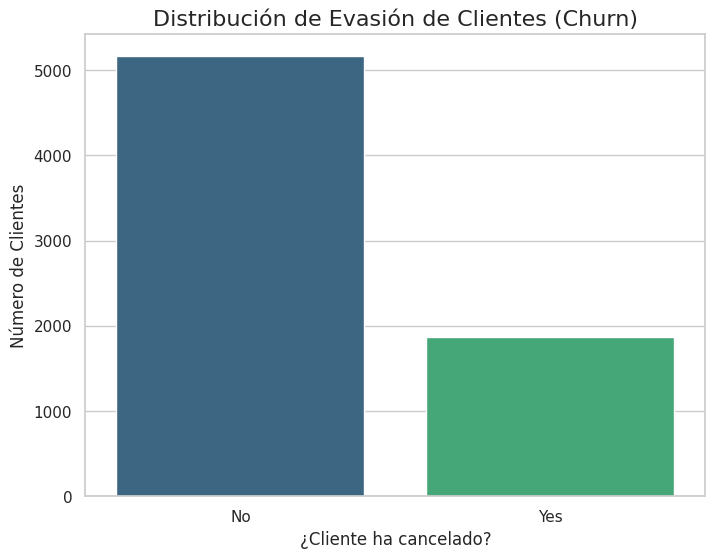


--- Conteo y Porcentaje de Churn ---
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Tasa de Churn ('Yes'): 26.58%
Tasa de Retenci√≥n ('No'): 73.42%


In [31]:
# --- Paso 3.1: Visualizaci√≥n de la Distribuci√≥n de Churn ---

# Importamos las librer√≠as de visualizaci√≥n (Matplotlib y Seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo de los gr√°ficos para una presentaci√≥n profesional
sns.set(style="whitegrid")

# 1. Creaci√≥n del Gr√°fico de Barras (Countplot)
plt.figure(figsize=(8, 6))
# Usamos 'Churn' en el eje X para contar las ocurrencias de 'No' y 'Yes'
ax = sns.countplot(x='Churn', data=datos_limpios, palette='viridis')

# 2. A√±adimos T√≠tulos y Etiquetas
ax.set_title('Distribuci√≥n de Evasi√≥n de Clientes (Churn)', fontsize=16)
ax.set_xlabel('¬øCliente ha cancelado?', fontsize=12)
ax.set_ylabel('N√∫mero de Clientes', fontsize=12)

# 3. Mostramos el gr√°fico
plt.show()

# 4. Calculamos e imprimimos la tasa de Churn (para el informe final)
print("\n--- Conteo y Porcentaje de Churn ---")
# .value_counts(normalize=True) nos da la proporci√≥n
proporcion_churn = datos_limpios['Churn'].value_counts(normalize=True) * 100
print(datos_limpios['Churn'].value_counts())
print(f"\nTasa de Churn ('Yes'): {proporcion_churn['Yes']:.2f}%")
print(f"Tasa de Retenci√≥n ('No'): {proporcion_churn['No']:.2f}%")

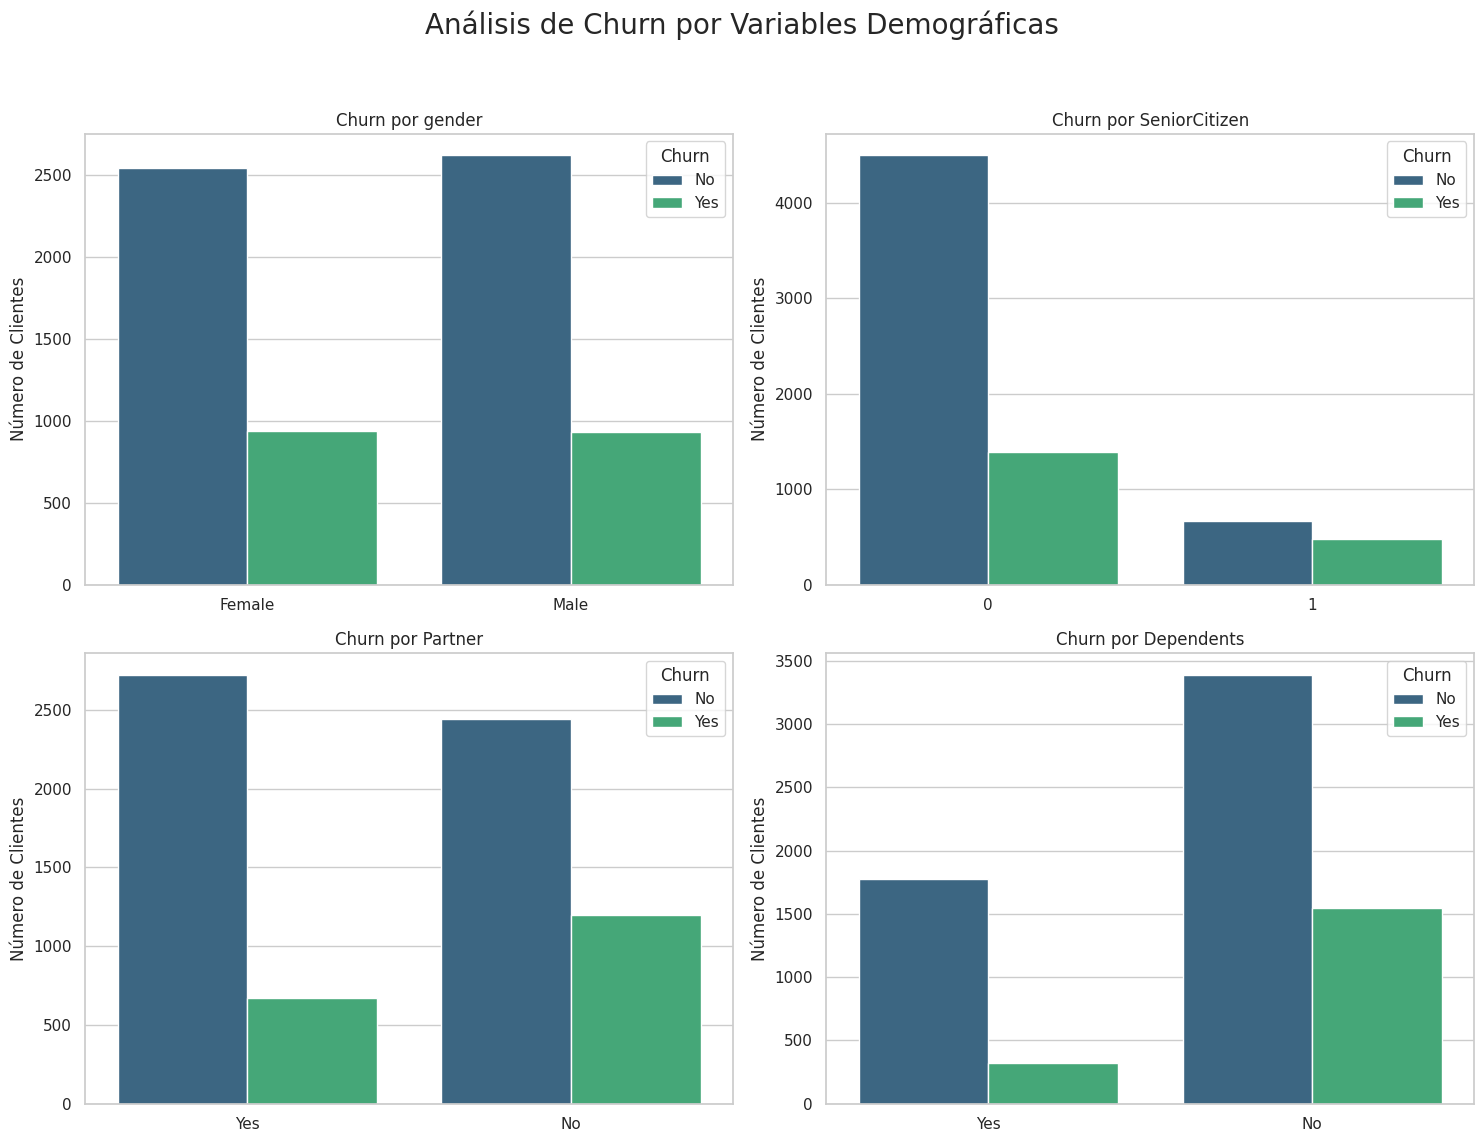

In [32]:
# --- Paso 3.2: An√°lisis de Churn por Perfil Demogr√°fico ---

# Lista de las columnas demogr√°ficas que vamos a analizar
variables_demograficas = ['customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents']

# Creamos una figura grande para agrupar los 4 gr√°ficos (2 filas, 2 columnas)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('An√°lisis de Churn por Variables Demogr√°ficas', fontsize=20)

# Usamos un bucle para crear un gr√°fico para cada variable de la lista
for i, columna in enumerate(variables_demograficas):
    ax = axes.flatten()[i] # Seleccionamos el subgr√°fico correspondiente
    # Usamos 'hue="Churn"' para que Seaborn cree barras separadas para 'Yes' y 'No'
    sns.countplot(x=columna, hue='Churn', data=datos_limpios, ax=ax, palette='viridis')
    ax.set_title(f'Churn por {columna.split(".")[-1]}') # T√≠tulo din√°mico
    ax.set_xlabel('') # Limpiamos la etiqueta X para mayor claridad
    ax.set_ylabel('N√∫mero de Clientes')

# Ajustamos el espaciado y mostramos la figura completa
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

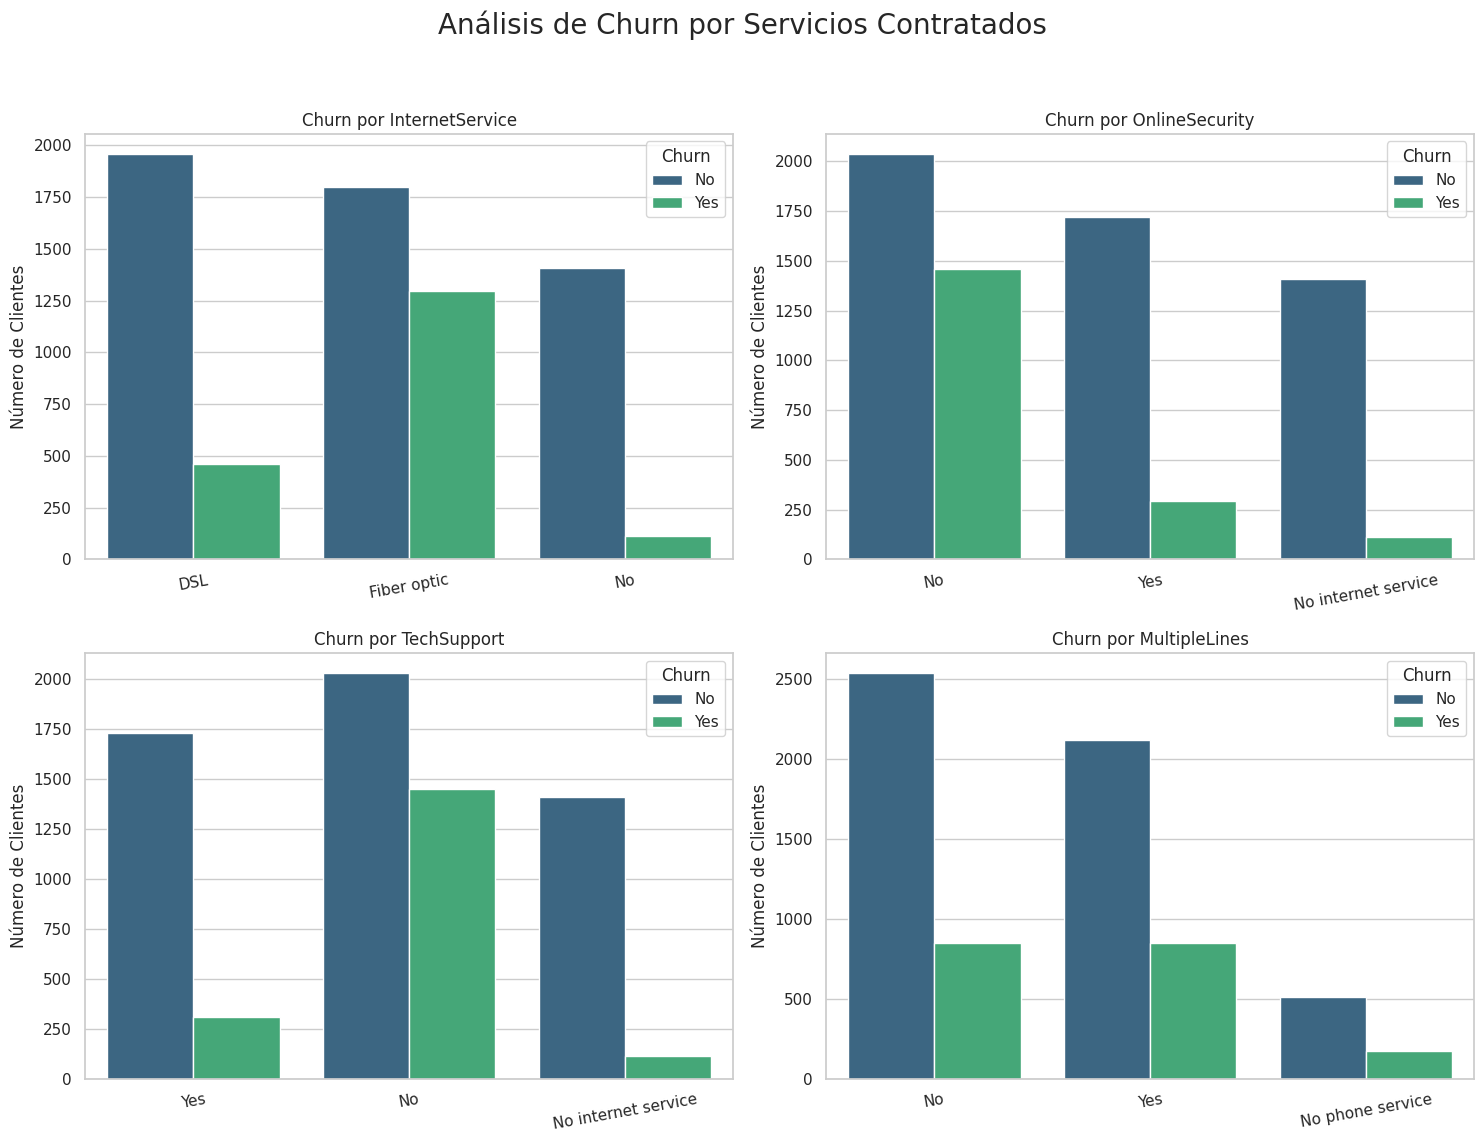

In [33]:
# --- Paso 3.3: An√°lisis de Churn por Servicios Contratados ---

# Lista de columnas clave relacionadas con los servicios
variables_servicios = ['internet.InternetService', 'internet.OnlineSecurity', 'internet.TechSupport', 'phone.MultipleLines']

# Creamos una nueva figura para este segundo dashboard
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('An√°lisis de Churn por Servicios Contratados', fontsize=20)

# Bucle para generar un gr√°fico por cada servicio
for i, columna in enumerate(variables_servicios):
    ax = axes.flatten()[i]
    sns.countplot(x=columna, hue='Churn', data=datos_limpios, ax=ax, palette='viridis')
    ax.set_title(f'Churn por {columna.split(".")[-1]}')
    ax.set_xlabel('')
    ax.set_ylabel('N√∫mero de Clientes')
    # Inclinamos las etiquetas si son largas para mejorar la legibilidad
    ax.tick_params(axis='x', rotation=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

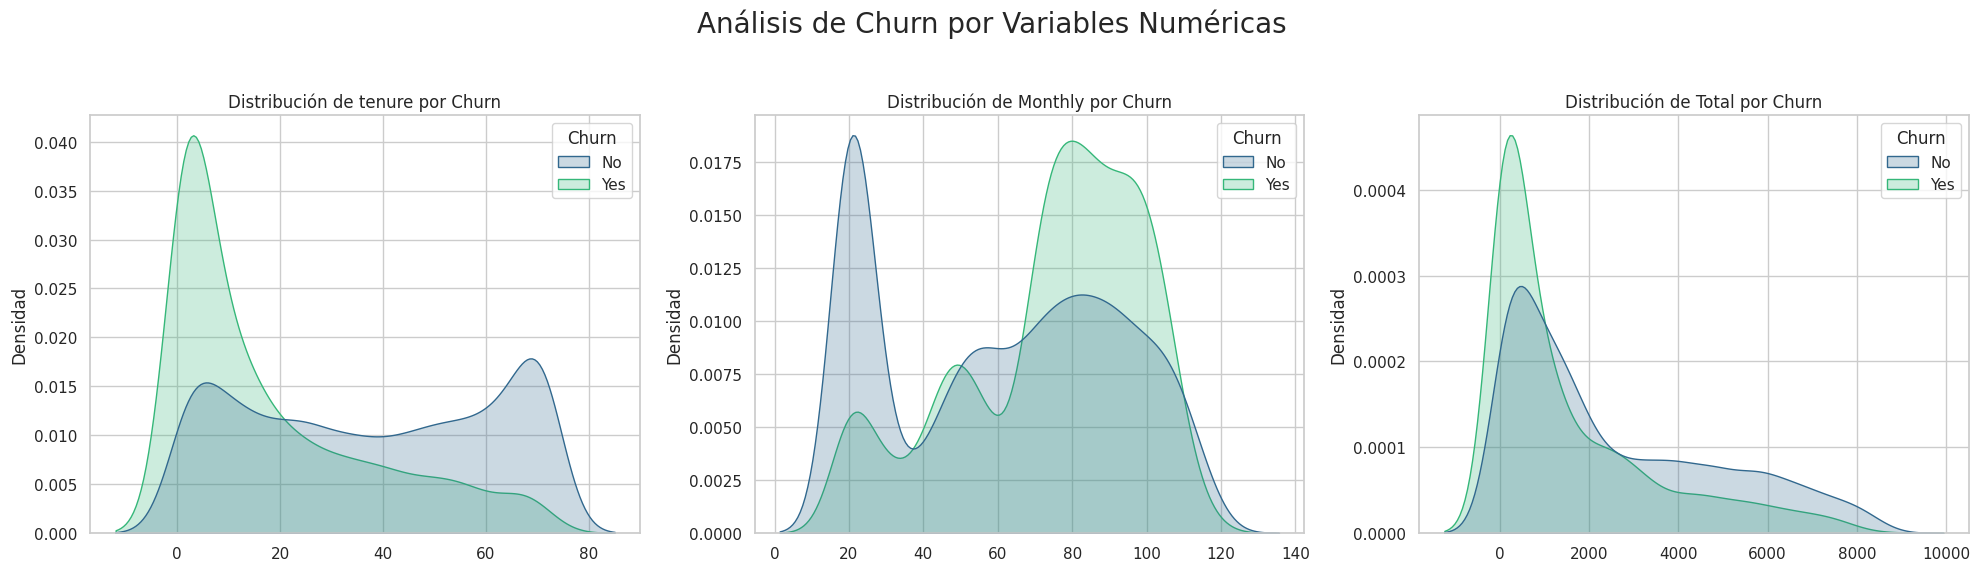

In [34]:
# --- Paso 3.4: An√°lisis de Churn por Variables Num√©ricas ---

# Lista de las columnas num√©ricas clave que queremos analizar
variables_numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Creamos una nueva figura para los tres gr√°ficos (1 fila, 3 columnas)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('An√°lisis de Churn por Variables Num√©ricas', fontsize=20)

# Bucle para generar un gr√°fico de densidad (KDE) por cada variable
for i, columna in enumerate(variables_numericas):
    ax = axes[i] # Seleccionamos el subgr√°fico
    # Usamos kdeplot para visualizar la forma de la distribuci√≥n de los datos.
    # El par√°metro 'hue' crea curvas separadas para 'Yes' y 'No'.
    sns.kdeplot(data=datos_limpios, x=columna, hue='Churn', fill=True, ax=ax, palette='viridis', common_norm=False)
    ax.set_title(f'Distribuci√≥n de {columna.split(".")[-1]} por Churn')
    ax.set_xlabel('')
    ax.set_ylabel('Densidad')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# üöÄ Informe Final: An√°lisis de Evasi√≥n de Clientes (Churn) - Telecom X

**Para:** Equipo de Data Science, Telecom X  
**De:** Gonzalo Malca Garcia, Analista de Datos  
**Fecha:** 19 de agosto de 2025  
**Asunto:** Hallazgos Clave del An√°lisis Exploratorio sobre las Causas del Churn.

---

### **üéØ Resumen Ejecutivo**

Este informe presenta los resultados de un an√°lisis exhaustivo sobre los factores que impulsan la **tasa de evasi√≥n (Churn) del 26.58%** en los clientes de Telecom X. A trav√©s de un proceso completo de **ETL (Extracci√≥n, Transformaci√≥n y Carga)**, se prepar√≥ un dataset de alta calidad para identificar los perfiles de riesgo y las causas operativas detr√°s de esta alta tasa de cancelaci√≥n.

El an√°lisis revela que el Churn no es un evento aleatorio, sino un patr√≥n concentrado en un segmento de clientes muy espec√≠fico, fuertemente ligado a su **antig√ºedad**, el **tipo de servicio de internet** contratado y la **ausencia de servicios de valor a√±adido**.

---

### **‚öôÔ∏è Proceso de ETL: De Datos Crudos a Insights de Calidad**

Los datos para este an√°lisis fueron extra√≠dos de una API en formato JSON. Se aplic√≥ un riguroso proceso de ETL que incluy√≥:
*   **Normalizaci√≥n:** Aplanamiento de la estructura JSON anidada para crear un DataFrame tabular.
*   **Limpieza de Datos:** Correcci√≥n de tipos de datos (ej. `Charges.Total` a num√©rico) y eliminaci√≥n de registros con datos categ√≥ricos inconsistentes en la variable `Churn`.
*   **Ingenier√≠a de Caracter√≠sticas:** Creaci√≥n de la m√©trica `Charges.Daily` para un an√°lisis m√°s granular.

El resultado es un DataFrame limpio y consistente de **7,032 clientes y 22 columnas**, listo para un an√°lisis fiable.

---

### **üîé Hallazgos Clave del An√°lisis Exploratorio (EDA)**

#### **Perfil del Cliente con Mayor Riesgo de Churn:**

El an√°lisis de segmentaci√≥n revel√≥ un perfil muy claro para los clientes que cancelan:

| Caracter√≠stica              | Perfil de Alto Riesgo de Churn                                 | Insight Clave                                                              |
| :-------------------------- | :------------------------------------------------------------- | :------------------------------------------------------------------------- |
| **üìÖ Antig√ºedad (Tenure)**   | **Clientes Nuevos** (pico de Churn en los primeros meses)      | La experiencia inicial es cr√≠tica. Hay una falla en el onboarding.           |
| **üåê Servicio de Internet** | **Fibra √ìptica**                                               | El servicio m√°s premium es, parad√≥jicamente, el mayor generador de cancelaciones. |
| **üõ°Ô∏è Servicios Adicionales**| **Sin Soporte T√©cnico y Sin Seguridad Online**                 | La falta de estos servicios de valor a√±adido es un fuerte predictor de Churn.     |
| **üë• Perfil Demogr√°fico**    | **Personas Mayores**, **Solteros** y **Sin Dependientes**        | Estos grupos muestran una propensi√≥n a cancelar significativamente mayor.      |
| **üí∞ Facturaci√≥n Mensual**   | **Clientes con las facturas mensuales m√°s altas**             | Se correlaciona directamente con el alto costo de la Fibra √ìptica.         |

---

### **üèÅ Conclusi√≥n y Pr√≥ximos Pasos**

El problema de Churn en Telecom X est√° claramente definido y concentrado. Basado en estos hallazgos, se pueden proponer estrategias de retenci√≥n enfocadas en **mejorar la experiencia del cliente de Fibra √ìptica durante los primeros meses** y en **promocionar servicios de valor a√±adido** como el Soporte T√©cnico y la Seguridad Online.

Este an√°lisis exploratorio proporciona una base s√≥lida y un dataset de alta calidad, listos para la siguiente fase: el **desarrollo de modelos de Machine Learning** para predecir el Churn de manera proactiva.